In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import vcf


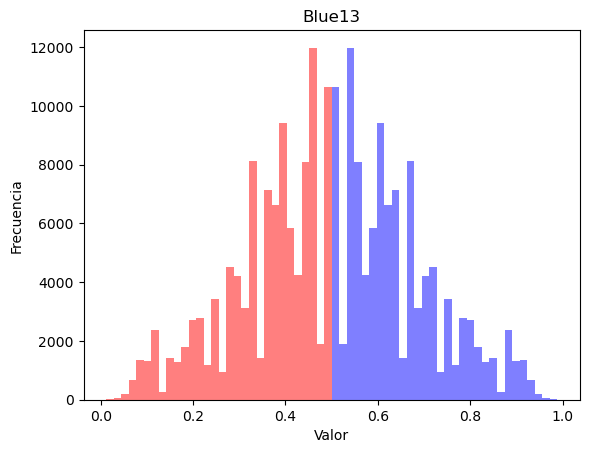

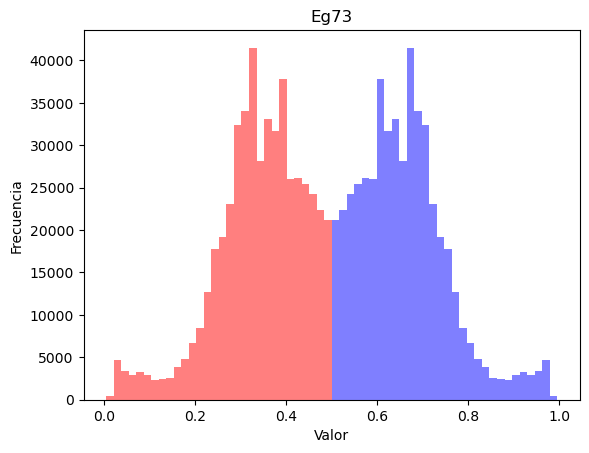

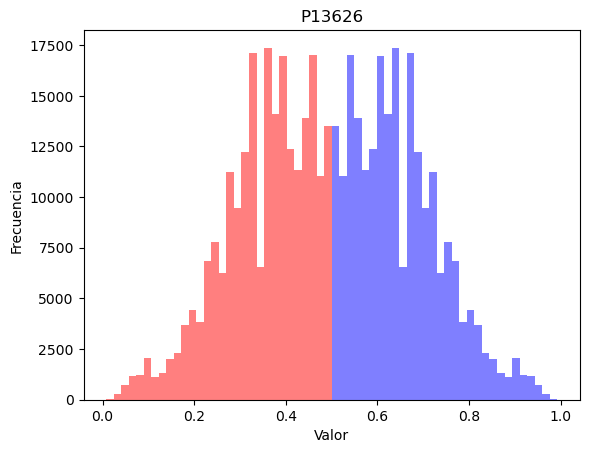

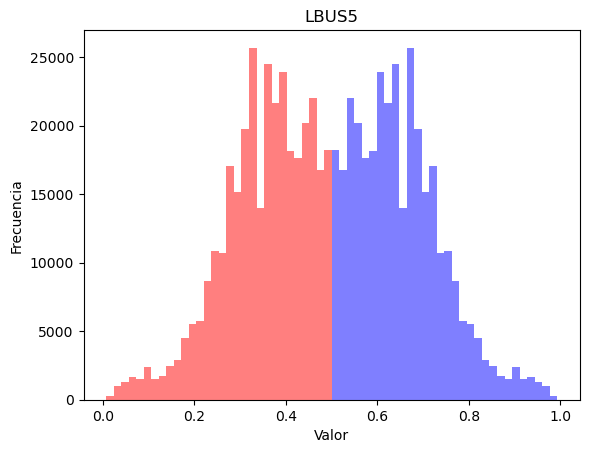

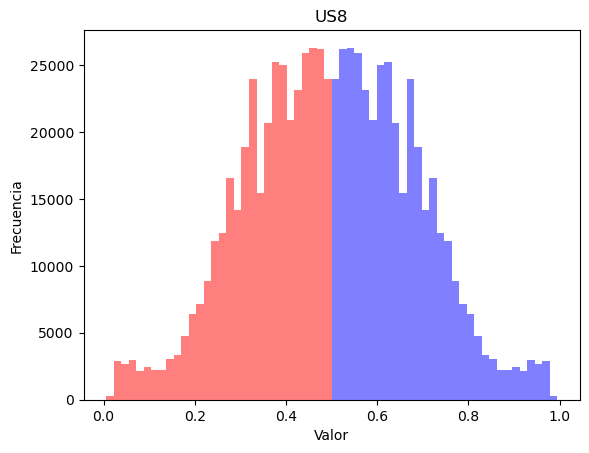

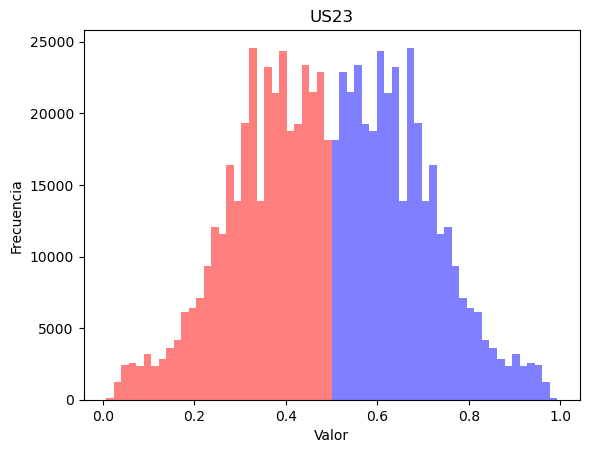

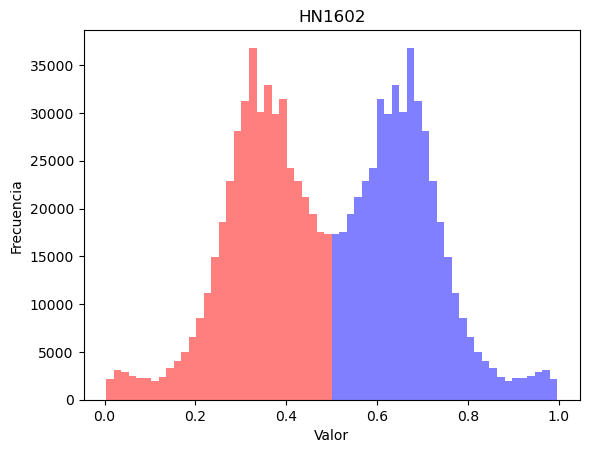

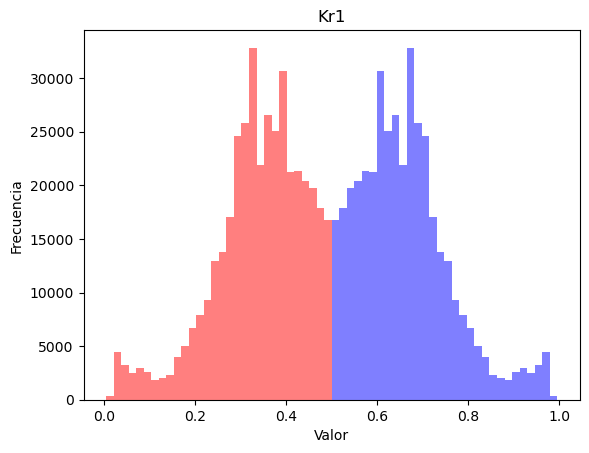

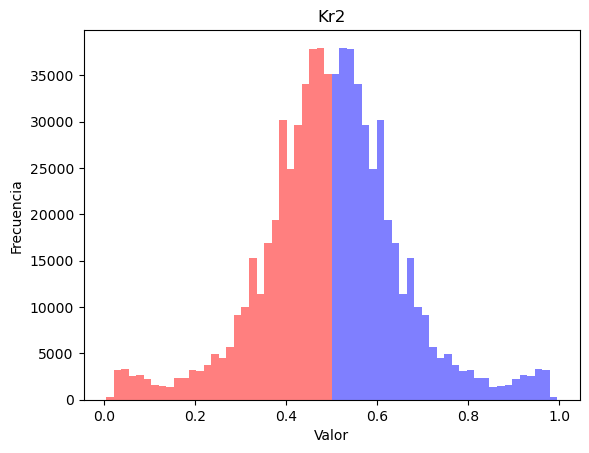

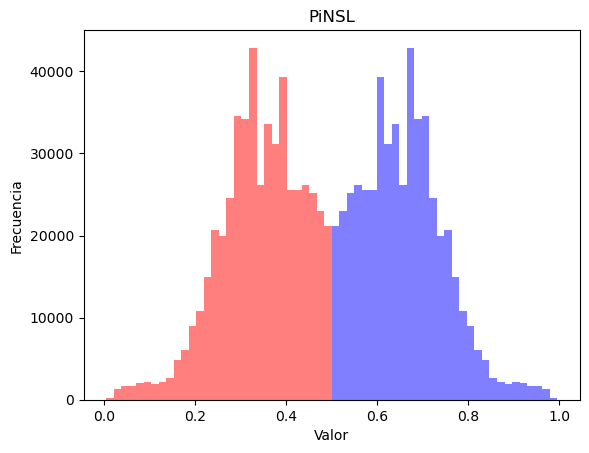

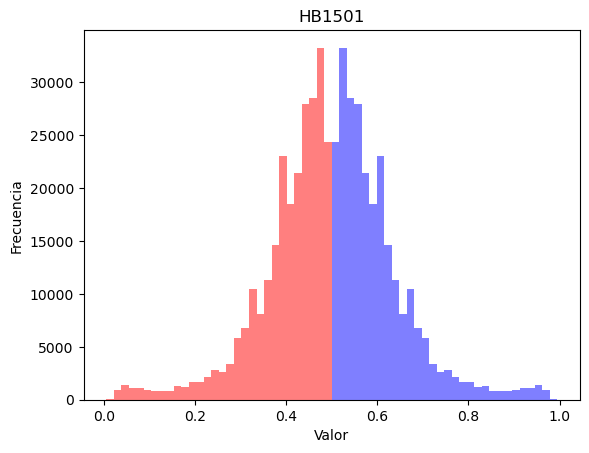

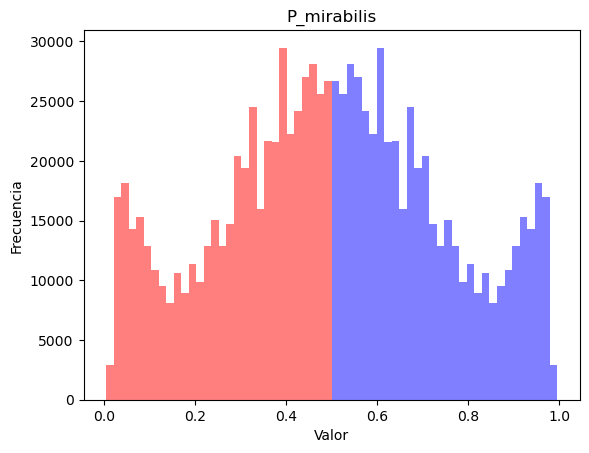

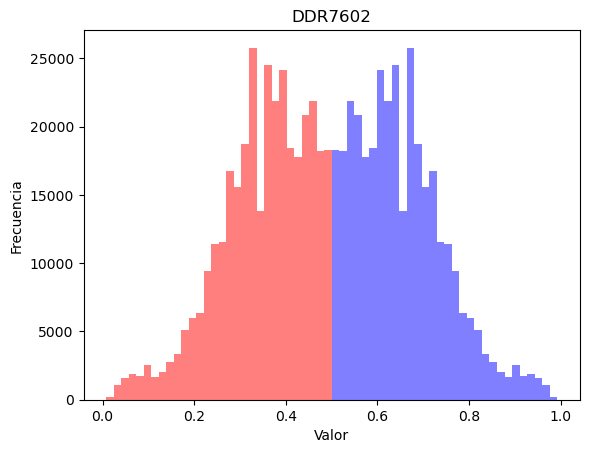

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nombres_muestras = ["Blue13", "Eg73", "P13626", "LBUS5", "US8", "US23", "HN1602", "Kr1", "Kr2", "PiNSL", "HB1501", "P_mirabilis", "DDR7602"]

# Leer el archivo VCF
df = pd.read_csv('multisample.vcf', comment='#', sep='\t', header=None)

# Extraer las columnas de las muestras
muestras = df.iloc[:, 9:]

# Crear un DataFrame para cada muestra
for i, muestra in enumerate(muestras.columns):
    # Extraer la columna DP4 y dividir los dos primeros valores por DP
    dp4 = muestras[muestra].str.split(':').str[4].str.split(',').apply(lambda x: [int(i) if i.isdigit() else np.nan for i in x])  # Cambiamos a la columna 5 para dp4
    dp = muestras[muestra].str.split(':').str[2].apply(lambda x: int(x) if x.isdigit() else np.nan)
    ref = (dp4.str[0] + dp4.str[1]) / dp  # Aquí cambiamos a usar la suma del primer y segundo valor de DP4 para ref
    alt = (dp4.str[2] + dp4.str[3]) / dp  # Aquí cambiamos a usar la suma del tercer y cuarto valor de DP4 para alt

    # Determinar cuál es mayoritario y calcular minoritario
    mayoritario = np.where(ref > alt, ref, alt)
    minoritario = 1 - mayoritario

    # Filtrar los valores 1.0 y 0.0
    mayoritario = mayoritario[(mayoritario != 1.0) & (mayoritario != 0.0)]  # Aquí filtramos los valores 1.0 y 0.0 de mayoritario
    minoritario = minoritario[(minoritario != 1.0) & (minoritario != 0.0)]  # Aquí filtramos los valores 1.0 y 0.0 de minoritario

    # Crear un nuevo DataFrame con los resultados
    df_muestra = pd.DataFrame({'mayoritario': mayoritario, 'minoritario': minoritario})
    df_muestra.to_csv(f'{nombres_muestras[i]}.tsv', sep='\t', index=False, na_rep='NaN')

    # Crear un histograma con los resultados
    plt.hist(df_muestra['mayoritario'].dropna(), color='blue', alpha=0.5, bins=30)
    plt.hist(df_muestra['minoritario'].dropna(), color='red', alpha=0.5, bins=30)
    plt.title(f'{nombres_muestras[i]}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()

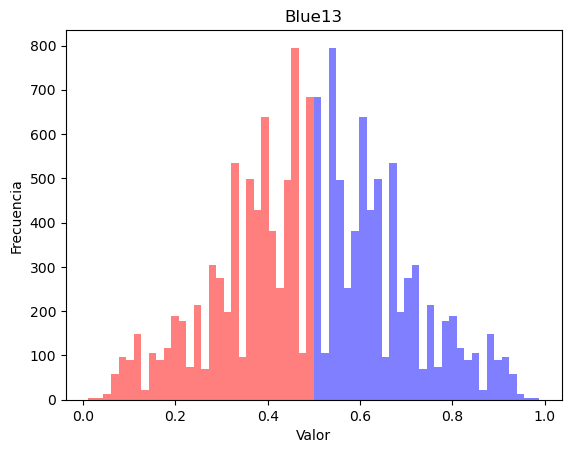

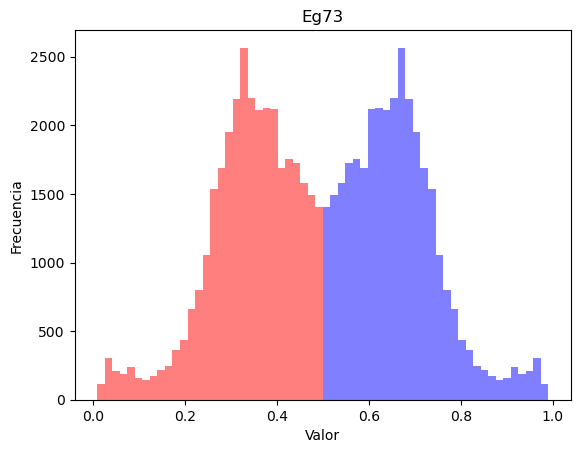

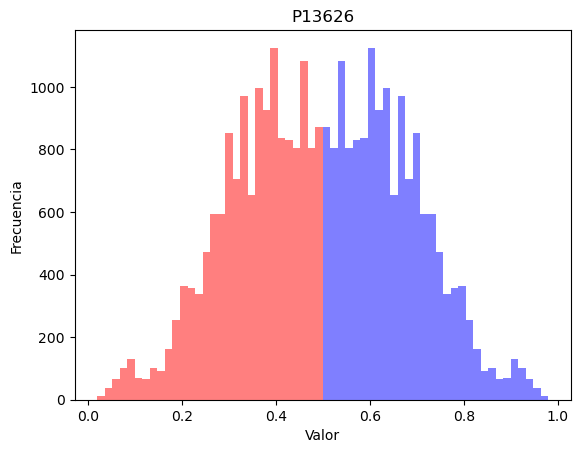

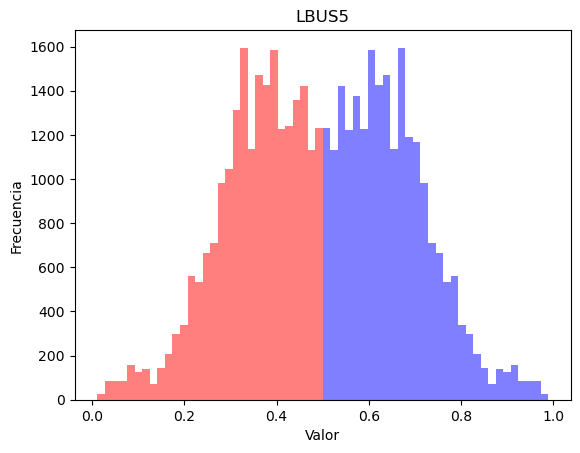

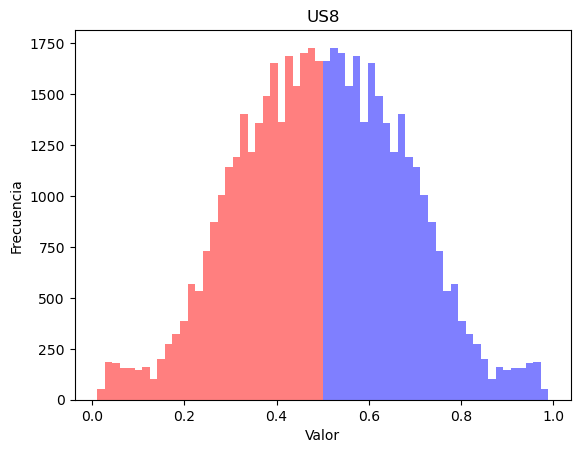

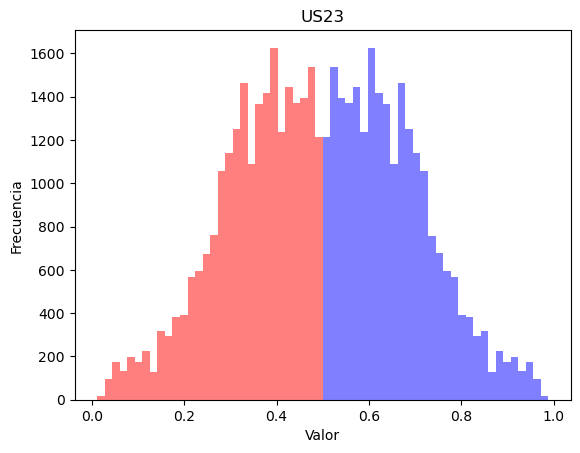

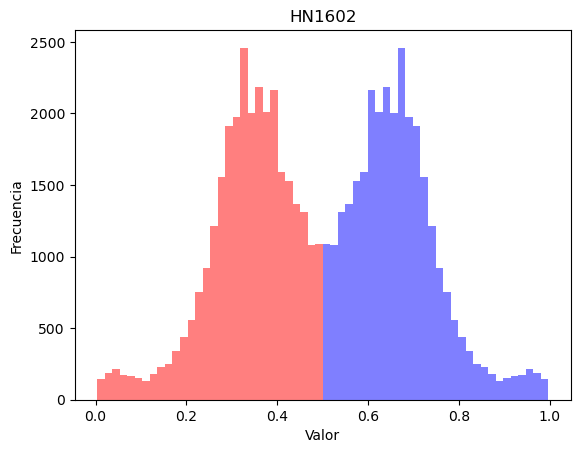

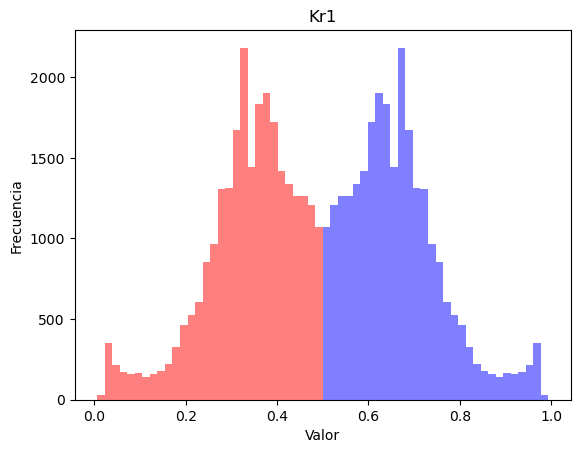

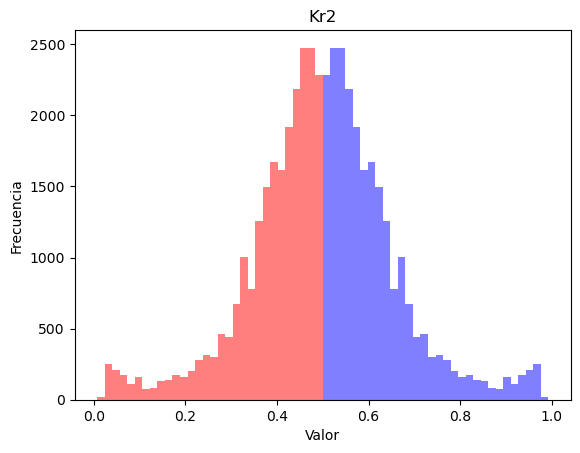

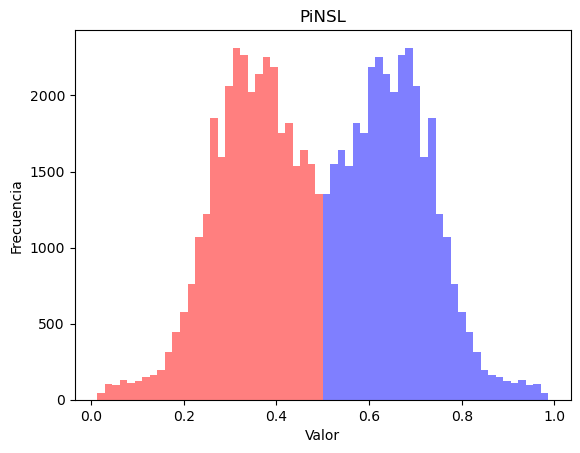

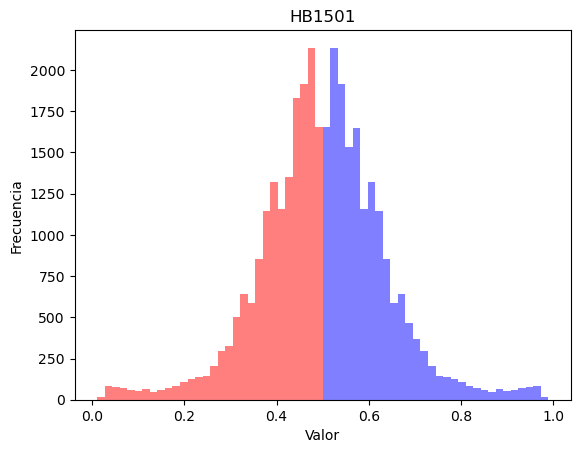

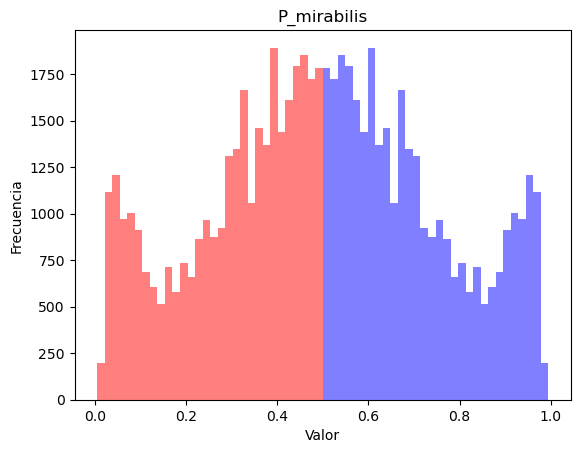

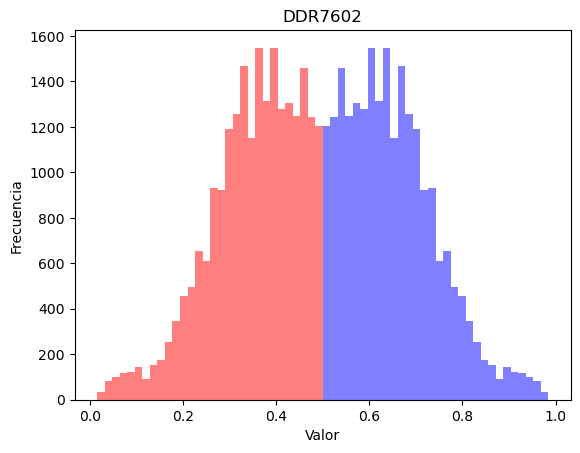

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nombres_muestras = ["Blue13", "Eg73", "P13626", "LBUS5", "US8", "US23", "HN1602", "Kr1", "Kr2", "PiNSL", "HB1501", "P_mirabilis", "DDR7602"]

# Leer el archivo VCF
df = pd.read_csv('snp200k.vcf', comment='#', sep='\t', header=None)

# Extraer las columnas de las muestras
muestras = df.iloc[:, 9:]

# Crear un DataFrame para cada muestra
for i, muestra in enumerate(muestras.columns):
    # Extraer la columna DP4 y dividir los dos primeros valores por DP
    dp4 = muestras[muestra].str.split(':').str[4].str.split(',').apply(lambda x: [int(i) if i.isdigit() else np.nan for i in x])  
    dp = muestras[muestra].str.split(':').str[2].apply(lambda x: int(x) if x.isdigit() else np.nan)
    ref = (dp4.str[0] + dp4.str[1]) / dp  # Aquí cambiamos a usar la suma del primer y segundo valor de DP4 para ref
    alt = (dp4.str[2] + dp4.str[3]) / dp  # Aquí cambiamos a usar la suma del tercer y cuarto valor de DP4 para alt

    # Determinar cuál es mayoritario y calcular minoritario
    mayoritario = np.where(ref > alt, ref, alt)
    minoritario = 1 - mayoritario

    # Filtrar los valores 1.0 y 0.0
    mayoritario = mayoritario[(mayoritario != 1.0) & (mayoritario != 0.0)]  # Aquí filtramos los valores 1.0 y 0.0 de mayoritario
    minoritario = minoritario[(minoritario != 1.0) & (minoritario != 0.0)]  # Aquí filtramos los valores 1.0 y 0.0 de minoritario

    # Crear un nuevo DataFrame con los resultados
    df_muestra = pd.DataFrame({'mayoritario': mayoritario, 'minoritario': minoritario})
    df_muestra.to_csv(f'{nombres_muestras[i]}.tsv', sep='\t', index=False, na_rep='NaN')

    # Crear un histograma con los resultados
    plt.hist(df_muestra['mayoritario'].dropna(), color='blue', alpha=0.5, bins=30)
    plt.hist(df_muestra['minoritario'].dropna(), color='red', alpha=0.5, bins=30)
    plt.title(f'{nombres_muestras[i]}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.savefig(f'snp_dist200k_{nombres_muestras[i]}.png')  # Guardar la figura
    plt.show()